In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from datetime import datetime

In [3]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

In [4]:
training_set = torchvision.datasets.FashionMNIST(
  root='./data',
  train=True,
  download=True,
  transform=transform
)
validation_set = torchvision.datasets.FashionMNIST(
  root='./data',
  train=False,
  download=True,
  transform=transform
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 277kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.87MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.8MB/s]


In [5]:
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
print(f"Training set has {len(training_set)} images")
print(f"Validation set has {len(validation_set)} images")

Training set has 60000 images
Validation set has 10000 images


Sneaker  Dress  T-shirt/top  Coat 


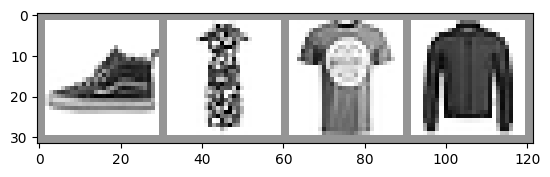

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        
dataiter = iter(training_loader)
images, labels = next(dataiter)

img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class GarmentClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, output_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(in_features=16*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*4*4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = GarmentClassifier()